In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import matplotlib.dates as mdates

# MIXED


In [5]:
#Import files
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_MIXED_fullData_good")


if True: #Load all csv files in directory and concat just once 
    extension = 'csv'

    #User trips
    user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]
    user_df= pd.concat([pd.read_csv(f) for f in user_filenames])

    #Food rips
    food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]
    food_df= pd.concat([pd.read_csv(f) for f in food_filenames])

    #Bike venets
    bike_filenames =[i for i in glob.glob('autonomousBike*.{}'.format(extension))]
    bike_df= pd.concat([pd.read_csv(f) for f in bike_filenames ])


In [6]:
user_df.columns

Index(['Cycle', 'Day', 'Time', 'NumBikes', 'Battery', 'AutDrivingSpeed',
       'MaxBiddingTime', 'UrgencyPerson', 'UrgencyPackage', 'UrgencyWeight',
       'WaitWeight', 'ProximityWeight', 'Agent', 'Trip Served',
       'Wait Time (min)', 'Departure Time', 'Arrival Time', 'Duration (min)',
       'Origin [lat]', 'Origin [lon]', 'Destination [lat]',
       'Destination [lon]', 'Distance (m)'],
      dtype='object')

In [7]:
user_df['Wait Time (min)'].describe()


count    44897.000000
mean         4.076289
std          2.949997
min          0.250000
25%          1.916667
50%          3.333333
75%          5.583333
max         32.333333
Name: Wait Time (min), dtype: float64

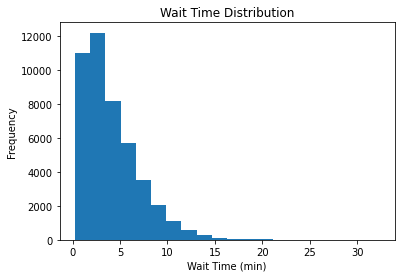

In [8]:

user_df['Wait Time (min)'].plot.hist(bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [9]:
food_df.columns

Index(['Cycle', 'Day', 'Time', 'NumBikes', 'Battery', 'AutDrivingSpeed',
       'MaxBiddingTime', 'UrgencyPerson', 'UrgencyPackage', 'UrgencyWeight',
       'WaitWeight', 'ProximityWeight', 'Agent', 'Trip Served',
       'Wait Time (min)', 'Departure Time', 'Arrival Time', 'Duration (min)',
       'Origin [lat]', 'Origin [lon]', 'Destination [lat]',
       'Destination [lon]', 'Distance (m)'],
      dtype='object')

In [10]:
food_df['Wait Time (min)'].describe()


count    96273.000000
mean         4.963160
std          3.558116
min          0.250000
25%          2.250000
50%          4.166667
75%          6.833333
max         41.250000
Name: Wait Time (min), dtype: float64

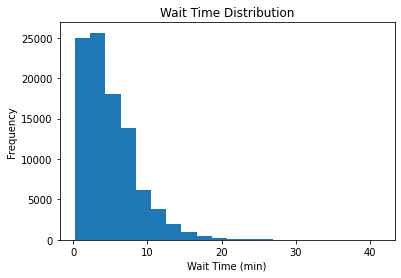

In [11]:

food_df['Wait Time (min)'].plot.hist(bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [12]:
bike_df.columns

Index(['Cycle', 'Day', 'Time', 'NumBikes', 'Battery', 'AutDrivingSpeed',
       'MaxBiddingTime', 'UrgencyPerson', 'UrgencyPackage', 'UrgencyWeight',
       'WaitWeight', 'ProximityWeight', 'Agent', 'Event', 'Activity',
       'Message', 'Start Time', 'End Time', 'Duration (min)',
       'Distance Traveled', 'Start Battery %', 'End Battery %',
       'Battery Gain %'],
      dtype='object')

In [13]:
bike_df.head()

,Cycle,Day,Time,NumBikes,Battery,AutDrivingSpeed,MaxBiddingTime,UrgencyPerson,UrgencyPackage,UrgencyWeight,...,Event,Activity,Message,Start Time,End Time,Duration (min),Distance Traveled,Start Battery %,End Battery %,Battery Gain %
0,0,1,00:00:00,337,70000.0,8.0,0,1,0,0.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,00:00:00,337,70000.0,8.0,0,1,0,0.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,00:00:00,337,70000.0,8.0,0,1,0,0.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,00:00:00,337,70000.0,8.0,0,1,0,0.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,00:00:00,337,70000.0,8.0,0,1,0,0.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
bike_df.groupby('Event')['Distance Traveled'].describe()


,count,mean,std,min,25%,50%,75%,max
Event,,,,,,,,
END: in_use_packages,96273.0,1431.427255,1127.265179,0.000000,610.765497,1142.365840,1922.656102,6789.502770
END: in_use_people,44897.0,1670.752949,972.657966,0.000000,1026.367238,1465.601310,2060.245398,6626.097592
END: low_battery,6529.0,231.417125,158.663019,0.000000,122.920747,206.953231,312.513982,1585.590035
END: picking_up_packages,96273.0,601.558007,475.172462,0.000000,243.791075,497.593441,844.367132,5333.977589
END: picking_up_people,44916.0,477.393277,399.514805,0.000000,179.894553,389.241312,680.099949,4514.854649
END: rebalancing,99.0,2814.100735,2024.826077,148.737932,590.857695,2172.214879,4495.418949,5755.749424
END: wandering,147787.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
START: in_use_packages,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: in_use_people,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Group by 'Event' and calculate the total distance for each 'Event' type
total_distance_by_event = bike_df.groupby('Event')['Distance Traveled'].sum()

# Calculate the total distance traveled across all 'Event' types
total_distance_all_events = total_distance_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_distance_by_event = (total_distance_by_event / total_distance_all_events) * 100

# Create a DataFrame to display the results
percentage_distance_df = pd.DataFrame({'Event': percentage_distance_by_event.index, 'Distance Percentage': percentage_distance_by_event.values})

# Display the result
print(percentage_distance_df)



                         Event  Distance Percentage
0         END: in_use_packages            46.878901
1           END: in_use_people            25.517210
2             END: low_battery             0.513980
3     END: picking_up_packages            19.700881
4       END: picking_up_people             7.294256
5             END: rebalancing             0.094772
6               END: wandering             0.000000
7       START: in_use_packages             0.000000
8         START: in_use_people             0.000000
9           START: low_battery             0.000000
10  START: picking_up_packages             0.000000
11    START: picking_up_people             0.000000
12          START: rebalancing             0.000000
13            START: wandering             0.000000


In [16]:
#Group by 'Event' and calculate the total distance for each 'Event' type
total_time_by_event = bike_df.groupby('Event')['Duration (min)'].sum()

# Calculate the total time traveled across all 'Event' types
total_time_all_events = total_time_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_time_by_event = (total_time_by_event / total_time_all_events) * 100

# Create a DataFrame to display the results
percentage_time_df = pd.DataFrame({'Event': percentage_time_by_event.index, 'Time Percentage': percentage_time_by_event.values})

# Display the result
print(percentage_time_df)

                         Event  Time Percentage
0         END: in_use_packages         1.723149
1           END: in_use_people         0.733790
2             END: low_battery         0.021466
3     END: picking_up_packages         0.742002
4       END: picking_up_people         0.280957
5             END: rebalancing         0.003506
6               END: wandering        96.495129
7       START: in_use_packages         0.000000
8         START: in_use_people         0.000000
9           START: low_battery         0.000000
10  START: picking_up_packages         0.000000
11    START: picking_up_people         0.000000
12          START: rebalancing         0.000000
13            START: wandering         0.000000


# USERS

In [17]:
#Import files
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_USER_Fulldata")


if True: #Load all csv files in directory and concat just once 
    extension = 'csv'

    #User trips
    user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]
    user_df_u= pd.concat([pd.read_csv(f) for f in user_filenames])

    #Bike events
    bike_filenames =[i for i in glob.glob('autonomousBike*.{}'.format(extension))]
    bike_df_u= pd.concat([pd.read_csv(f) for f in bike_filenames ])

In [18]:
user_df_u['Wait Time (min)'].describe()

count    536035.000000
mean          3.682755
std           2.858921
min           0.250000
25%           1.583333
50%           2.916667
75%           5.083333
max          31.250000
Name: Wait Time (min), dtype: float64

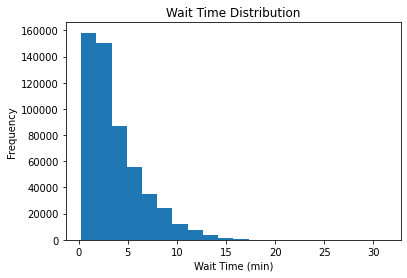

In [19]:

user_df_u['Wait Time (min)'].plot.hist(bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [20]:
bike_df_u.groupby('Event')['Distance Traveled'].describe()


,count,mean,std,min,25%,50%,75%,max
Event,,,,,,,,
END: in_use_people,536045.0,1623.166284,927.759309,0.0,998.954311,1436.235169,2018.945457,7619.097243
END: low_battery,25435.0,217.456663,153.059623,0.0,113.667018,202.014551,296.185058,1585.590035
END: picking_up_people,536373.0,423.996287,391.408018,0.0,134.943717,327.117785,601.432642,3611.879962
END: wandering,561846.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
START: in_use_people,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: low_battery,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: picking_up_people,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: wandering,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Group by 'Event' and calculate the total distance for each 'Event' type
total_distance_by_event = bike_df_u.groupby('Event')['Distance Traveled'].sum()

# Calculate the total distance traveled across all 'Event' types
total_distance_all_events = total_distance_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_distance_by_event = (total_distance_by_event / total_distance_all_events) * 100

# Create a DataFrame to display the results
percentage_distance_df_u = pd.DataFrame({'Event': percentage_distance_by_event.index, 'Distance Percentage': percentage_distance_by_event.values})

# Display the result
print(percentage_distance_df_u)

                      Event  Distance Percentage
0        END: in_use_people            78.881012
1          END: low_battery             0.501433
2    END: picking_up_people            20.617555
3            END: wandering             0.000000
4      START: in_use_people             0.000000
5        START: low_battery             0.000000
6  START: picking_up_people             0.000000
7          START: wandering             0.000000


In [22]:
#Group by 'Event' and calculate the total distance for each 'Event' type
total_time_by_event = bike_df_u.groupby('Event')['Duration (min)'].sum()

# Calculate the total time traveled across all 'Event' types
total_time_all_events = total_time_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_time_by_event = (total_time_by_event / total_time_all_events) * 100

# Create a DataFrame to display the results
percentage_time_df_u = pd.DataFrame({'Event': percentage_time_by_event.index, 'Time Percentage': percentage_time_by_event.values})

# Display the result
print(percentage_time_df_u)

                      Event  Time Percentage
0        END: in_use_people         7.782789
1          END: low_battery         0.070518
2    END: picking_up_people         2.749113
3            END: wandering        89.397580
4      START: in_use_people         0.000000
5        START: low_battery         0.000000
6  START: picking_up_people         0.000000
7          START: wandering         0.000000


# FOOD

In [23]:
#Import files
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_FOOD_FullData_good")


if True: #Load all csv files in directory and concat just once 
    extension = 'csv'

    #Food rips
    food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]
    food_df_f= pd.concat([pd.read_csv(f) for f in food_filenames])

    #Bike venets
    bike_filenames =[i for i in glob.glob('autonomousBike*.{}'.format(extension))]
    bike_df_f= pd.concat([pd.read_csv(f) for f in bike_filenames ])

In [24]:
food_df_f['Wait Time (min)'].describe()

count    96273.000000
mean         5.871523
std          5.444190
min          0.000000
25%          2.583333
50%          4.750000
75%          7.583333
max         57.833333
Name: Wait Time (min), dtype: float64

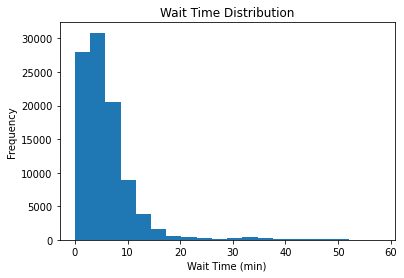

In [25]:

food_df_f['Wait Time (min)'].plot.hist(bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [26]:
bike_df_f.groupby('Event')['Distance Traveled'].describe()

,count,mean,std,min,25%,50%,75%,max
Event,,,,,,,,
END: in_use_packages,95842.0,1430.639109,1125.832204,0.0,608.180070,1144.326138,1922.656102,6789.502770
END: low_battery,4741.0,247.045579,164.266763,0.0,138.544948,221.163044,334.694987,891.131296
END: picking_up_packages,95842.0,724.445065,724.902870,0.0,289.723703,570.223466,938.230698,7702.095918
END: wandering,100583.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
START: in_use_packages,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: low_battery,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: picking_up_packages,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: wandering,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Group by 'Event' and calculate the total distance for each 'Event' type
total_distance_by_event = bike_df_f.groupby('Event')['Distance Traveled'].sum()

# Calculate the total distance traveled across all 'Event' types
total_distance_all_events = total_distance_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_distance_by_event = (total_distance_by_event / total_distance_all_events) * 100

# Create a DataFrame to display the results
percentage_distance_df_f = pd.DataFrame({'Event': percentage_distance_by_event.index, 'Distance Percentage': percentage_distance_by_event.values})

# Display the result
print(percentage_distance_df_f)

                        Event  Distance Percentage
0        END: in_use_packages            66.010058
1            END: low_battery             0.563860
2    END: picking_up_packages            33.426082
3              END: wandering             0.000000
4      START: in_use_packages             0.000000
5          START: low_battery             0.000000
6  START: picking_up_packages             0.000000
7            START: wandering             0.000000


In [28]:
#Group by 'Event' and calculate the total distance for each 'Event' type
total_time_by_event = bike_df_f.groupby('Event')['Duration (min)'].sum()

# Calculate the total time traveled across all 'Event' types
total_time_all_events = total_time_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_time_by_event = (total_time_by_event / total_time_all_events) * 100

# Create a DataFrame to display the results
percentage_time_df_f = pd.DataFrame({'Event': percentage_time_by_event.index, 'Time Percentage': percentage_time_by_event.values})

# Display the result
print(percentage_time_df_f)

                        Event  Time Percentage
0        END: in_use_packages         2.275116
1            END: low_battery         0.021938
2    END: picking_up_packages         1.174591
3              END: wandering        96.528355
4      START: in_use_packages         0.000000
5          START: low_battery         0.000000
6  START: picking_up_packages         0.000000
7            START: wandering         0.000000


 # BIDDING


In [29]:
#Import files
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_BIDDING_FullData_good")


if True: #Load all csv files in directory and concat just once 
    extension = 'csv'

    #User trips
    user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]
    user_df_b= pd.concat([pd.read_csv(f) for f in user_filenames])

    #Food rips
    food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]
    food_df_b= pd.concat([pd.read_csv(f) for f in food_filenames])

    #Bike venets
    bike_filenames =[i for i in glob.glob('autonomousBike*.{}'.format(extension))]
    bike_df_b= pd.concat([pd.read_csv(f) for f in bike_filenames ])

In [30]:
user_df_b['Wait Time (min)'].describe()

count    44897.000000
mean         3.951431
std          2.762726
min          0.250000
25%          1.833333
50%          3.333333
75%          5.500000
max         24.833333
Name: Wait Time (min), dtype: float64

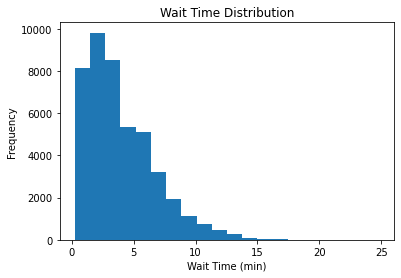

In [31]:

user_df_b['Wait Time (min)'].plot.hist(bins=20)  
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [32]:
food_df_b['Wait Time (min)'].describe()

count    96273.000000
mean         4.355156
std          2.994860
min          0.250000
25%          2.000000
50%          3.750000
75%          6.166667
max         27.500000
Name: Wait Time (min), dtype: float64

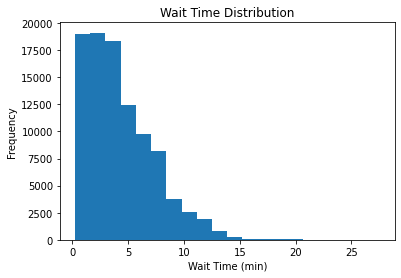

In [33]:

food_df_b['Wait Time (min)'].plot.hist(bins=20) 
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [34]:
bike_df_b.groupby('Event')['Distance Traveled'].describe()

,count,mean,std,min,25%,50%,75%,max
Event,,,,,,,,
END: bidding,141189.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
END: endBid,141189.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
END: in_use_packages,96273.0,1431.442087,1127.302803,0.000000,610.765497,1142.365840,1922.656102,6789.502770
END: in_use_people,44897.0,1670.763942,972.597748,0.000000,1026.367238,1466.478004,2060.820360,6626.097592
END: low_battery,6387.0,232.687114,162.636408,0.000000,124.446137,212.848961,312.588226,1585.590035
END: picking_up_packages,96273.0,539.962796,402.718274,0.000000,225.375609,456.928009,784.381117,3493.242854
END: picking_up_people,44916.0,483.422967,380.041750,0.000000,198.920424,404.591403,693.172487,3181.814353
END: rebalancing,253.0,2817.982497,1655.373826,148.737932,1871.337455,2497.561225,3676.687831,5755.749424
END: wandering,147732.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [35]:
# Group by 'Event' and calculate the total distance for each 'Event' type
total_distance_by_event = bike_df_b.groupby('Event')['Distance Traveled'].sum()

# Calculate the total distance traveled across all 'Event' types
total_distance_all_events = total_distance_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_distance_by_event = (total_distance_by_event / total_distance_all_events) * 100

# Create a DataFrame to display the results
percentage_distance_df_b = pd.DataFrame({'Event': percentage_distance_by_event.index, 'Distance Percentage': percentage_distance_by_event.values})

# Display the result
print(percentage_distance_df_b)

                         Event  Distance Percentage
0                 END: bidding             0.000000
1                  END: endBid             0.000000
2         END: in_use_packages            47.731445
3           END: in_use_people            25.981170
4             END: low_battery             0.514749
5     END: picking_up_packages            18.005063
6       END: picking_up_people             7.520637
7             END: rebalancing             0.246936
8               END: wandering             0.000000
9               START: bidding             0.000000
10               START: endBid             0.000000
11      START: in_use_packages             0.000000
12        START: in_use_people             0.000000
13          START: low_battery             0.000000
14  START: picking_up_packages             0.000000
15    START: picking_up_people             0.000000
16          START: rebalancing             0.000000
17            START: wandering             0.000000


In [36]:
#Group by 'Event' and calculate the total distance for each 'Event' type
total_time_by_event = bike_df_b.groupby('Event')['Duration (min)'].sum()

# Calculate the total time traveled across all 'Event' types
total_time_all_events = total_time_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_time_by_event = (total_time_by_event / total_time_all_events) * 100

# Create a DataFrame to display the results
percentage_time_df_b = pd.DataFrame({'Event': percentage_time_by_event.index, 'Time Percentage': percentage_time_by_event.values})

# Display the result
print(percentage_time_df_b)

                         Event  Time Percentage
0                 END: bidding         0.169270
1                  END: endBid         0.000000
2         END: in_use_packages         1.757183
3           END: in_use_people         0.748284
4             END: low_battery         0.021378
5     END: picking_up_packages         0.685812
6       END: picking_up_people         0.289647
7             END: rebalancing         0.007071
8               END: wandering        96.321354
9               START: bidding         0.000000
10               START: endBid         0.000000
11      START: in_use_packages         0.000000
12        START: in_use_people         0.000000
13          START: low_battery         0.000000
14  START: picking_up_packages         0.000000
15    START: picking_up_people         0.000000
16          START: rebalancing         0.000000
17            START: wandering         0.000000


# SUMMARY

### Wait times

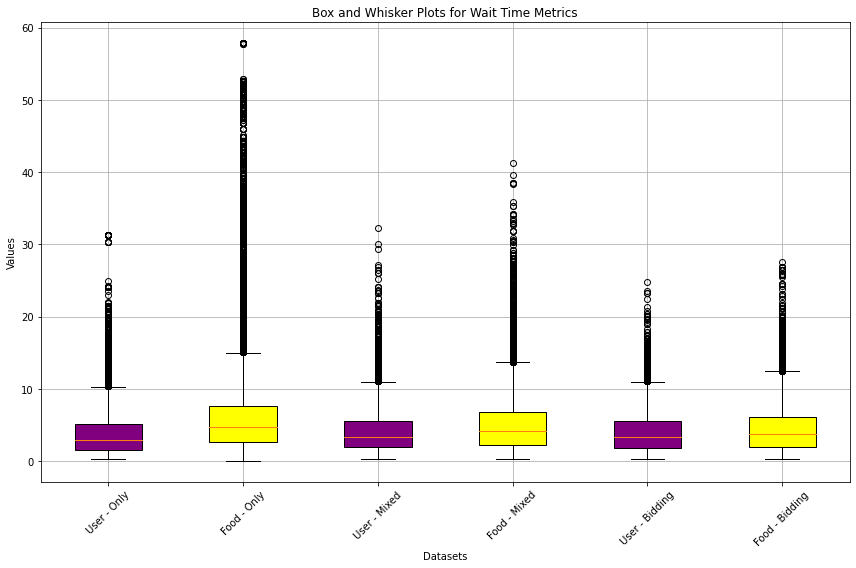

In [45]:

# Set the columns you want to include in the plot
columns_to_plot = ['Wait Time (min)']

# Create a list of flattened data for each dataset
data_frames = [ user_df_u,food_df_f, user_df, food_df,  user_df_b, food_df_b]
labels = ['User - Only', 'Food - Only', 'User - Mixed', 'Food - Mixed', 'User - Bidding', 'Food - Bidding']

data = [df[columns_to_plot].values.flatten() for df in data_frames]

# Create a box and whisker plot for the combined data
plt.figure(figsize=(12, 8))

# Plot multiple boxes in one plot with custom colors
bp = plt.boxplot(data, labels=labels, patch_artist=True)

# Assign different colors to the boxes
colors = ['purple', 'yellow', 'purple', 'yellow', 'purple', 'yellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add labels and title
plt.xlabel('Datasets')
plt.ylabel('Values')
plt.title('Box and Whisker Plots for Wait Time Metrics')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [50]:
import numpy as np

# Calculate summary statistics for each dataset
summary_data = []

for df, label in zip(data_frames, labels):
    data = df[columns_to_plot].values.flatten()
    mean = data.mean()
    median = np.median(data)
    std = data.std()
    minimum = data.min()
    maximum = data.max()
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    summary_data.append({
        'Dataset': label,
        'Mean': mean,
        'Median': median,
        'Std': std,
        'Min': minimum,
        'Q1': q1,
        'Q3': q3,
        'Max': maximum,
    })

# Create a DataFrame from the summary data
summary_df = pd.DataFrame(summary_data)







In [51]:
# Display the summary table
summary_df


,Dataset,Mean,Median,Std,Min,Q1,Q3,Max
0,User - Only,3.682755,2.916667,2.858918,0.25,1.583333,5.083333,31.250000
1,Food - Only,5.871523,4.750000,5.444161,0.00,2.583333,7.583333,57.833333
2,User - Mixed,4.076289,3.333333,2.949964,0.25,1.916667,5.583333,32.333333
3,Food - Mixed,4.963160,4.166667,3.558098,0.25,2.250000,6.833333,41.250000
4,User - Bidding,3.951431,3.333333,2.762695,0.25,1.833333,5.500000,24.833333
5,Food - Bidding,4.355156,3.750000,2.994845,0.25,2.000000,6.166667,27.500000


### Time

In [38]:
# Define a mapping of old column names to new column names
column_mapping = {
   'END: bidding' : 'Bidding',
    'END: in_use_packages' : 'In use package',
    'END: in_use_people': 'In use rider',
    'END: low_battery': 'Recharge',
    'END: picking_up_packages' : 'Package pickup',
    'END: picking_up_people': 'Rider pickup',
    'END: rebalancing' : 'Rebalancing',
    'END: wandering': 'Idling'
}

# Create a new DataFrame with the renamed columns
time_b = percentage_time_df_b.rename(columns={'Event': 'New Column Name'})

# Map the old column names to new column names
time_b['New Column Name'] = time_b['New Column Name'].map(column_mapping)

# Display the DataFrame with renamed columns
print(time_b)

   New Column Name  Time Percentage
0          Bidding         0.169270
1              NaN         0.000000
2   In use package         1.757183
3     In use rider         0.748284
4         Recharge         0.021378
5   Package pickup         0.685812
6     Rider pickup         0.289647
7      Rebalancing         0.007071
8           Idling        96.321354
9              NaN         0.000000
10             NaN         0.000000
11             NaN         0.000000
12             NaN         0.000000
13             NaN         0.000000
14             NaN         0.000000
15             NaN         0.000000
16             NaN         0.000000
17             NaN         0.000000


In [39]:
# Create a new DataFrame with the renamed columns
time = percentage_time_df.rename(columns={'Event': 'New Column Name'})

# Map the old column names to new column names
time['New Column Name'] = time['New Column Name'].map(column_mapping)

# Display the DataFrame with renamed columns
print(time)



   New Column Name  Time Percentage
0   In use package         1.723149
1     In use rider         0.733790
2         Recharge         0.021466
3   Package pickup         0.742002
4     Rider pickup         0.280957
5      Rebalancing         0.003506
6           Idling        96.495129
7              NaN         0.000000
8              NaN         0.000000
9              NaN         0.000000
10             NaN         0.000000
11             NaN         0.000000
12             NaN         0.000000
13             NaN         0.000000


In [40]:
# Create a new DataFrame with the renamed columns
time_u = percentage_time_df_u.rename(columns={'Event': 'New Column Name'})

# Map the old column names to new column names
time_u['New Column Name'] = time_u['New Column Name'].map(column_mapping)

# Display the DataFrame with renamed columns
print(time_u)

  New Column Name  Time Percentage
0    In use rider         7.782789
1        Recharge         0.070518
2    Rider pickup         2.749113
3          Idling        89.397580
4             NaN         0.000000
5             NaN         0.000000
6             NaN         0.000000
7             NaN         0.000000


In [41]:
# Create a new DataFrame with the renamed columns
time_f = percentage_time_df_f.rename(columns={'Event': 'New Column Name'})

# Map the old column names to new column names
time_f['New Column Name'] = time_f['New Column Name'].map(column_mapping)

# Display the DataFrame with renamed columns
print(time_f)

  New Column Name  Time Percentage
0  In use package         2.275116
1        Recharge         0.021938
2  Package pickup         1.174591
3          Idling        96.528355
4             NaN         0.000000
5             NaN         0.000000
6             NaN         0.000000
7             NaN         0.000000


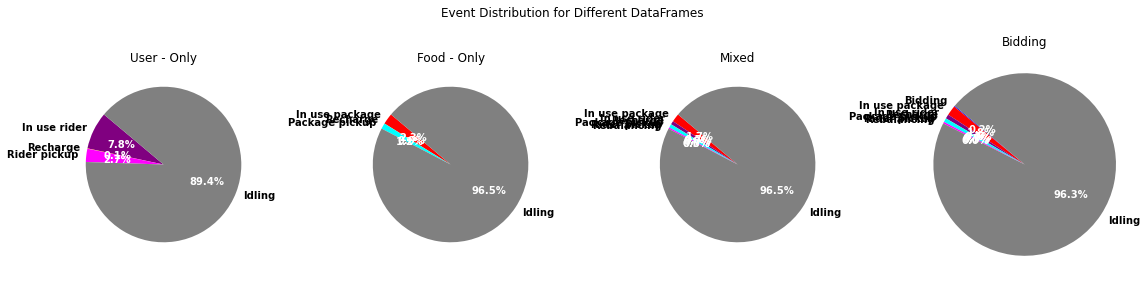

In [52]:

# Create a list of DataFrames
data_frames = [time_u, time_f, time, time_b]
titles = ['User - Only', 'Food - Only', 'Mixed', 'Bidding']

# Define a color map to ensure consistent colors for the same row names
color_map = {
    'Bidding': 'blue',
    'In use package': 'red',
    'In use rider': 'purple',
    'Recharge': 'orange',
    'Package pickup': 'cyan',
    'Rider pickup': 'magenta',
    'Rebalancing': 'brown',
    'Idling': 'gray',
}

# Create subplots for pie charts
fig, axes = plt.subplots(1, 4, figsize=(16, 4), facecolor='white')  # Set facecolor to white

# List to store the DataFrames
data_frames_pie = []

for i, ax in enumerate(axes):
    df = data_frames[i]

    # Filter out rows with Percentage > 0 (optional, to exclude zero percentage values)
    df = df[df['Time Percentage'] > 0]

    # Get unique row names and corresponding colors
    unique_rows = df['New Column Name'].unique()
    colors = [color_map.get(row, 'gray') for row in unique_rows]

    # Create the pie chart with improved settings
    wedges, texts, autotexts = ax.pie(
        df['Time Percentage'],
        labels=df['New Column Name'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,  # Use the assigned colors from the color map
    )

    # Adjust text properties for better readability
    for text, autotext in zip(texts, autotexts):
        text.set(size=10, weight='bold', color='black')
        autotext.set(size=10, weight='bold', color='white')

    # Add a title for each subplot
    ax.set_title(titles[i])

    # Append the DataFrame to the list
    data_frames_pie.append(df)

# Add a common title for all subplots
fig.suptitle('Event Distribution for Different DataFrames')

# Display the subplots
plt.axis('equal')  # Equal aspect ratio ensures that the pie charts are circular.
plt.tight_layout()
plt.show()


In [57]:

# Create a list of DataFrames
data_frames = [time_u, time_f, time, time_b]
titles = ['User - Only', 'Food - Only', 'Mixed', 'Bidding']

# Concatenate the DataFrames along the rows, using the titles as keys
consolidated_df = pd.concat(data_frames, keys=titles)

# Reset the index for the consolidated DataFrame
consolidated_df.reset_index(level=0, inplace=True)
consolidated_df.rename(columns={'level_0': 'Title', 'New Column Name': 'Event'}, inplace=True)

# Aggregate the duplicate entries by taking the mean (you can also use sum)
pivot_df = consolidated_df.pivot_table(index='Event', columns='Title', values='Time Percentage', aggfunc='mean')



Title             Bidding  Food - Only      Mixed  User - Only
Event                                                         
Bidding          0.169270          NaN        NaN          NaN
Idling          96.321354    96.528355  96.495129    89.397580
In use package   1.757183     2.275116   1.723149          NaN
In use rider     0.748284          NaN   0.733790     7.782789
Package pickup   0.685812     1.174591   0.742002          NaN
Rebalancing      0.007071          NaN   0.003506          NaN
Recharge         0.021378     0.021938   0.021466     0.070518
Rider pickup     0.289647          NaN   0.280957     2.749113


In [58]:
pivot_df

Title,Bidding,Food - Only,Mixed,User - Only
Event,,,,
Bidding,0.169270,NaN,NaN,NaN
Idling,96.321354,96.528355,96.495129,89.397580
In use package,1.757183,2.275116,1.723149,NaN
In use rider,0.748284,NaN,0.733790,7.782789
Package pickup,0.685812,1.174591,0.742002,NaN
Rebalancing,0.007071,NaN,0.003506,NaN
Recharge,0.021378,0.021938,0.021466,0.070518
Rider pickup,0.289647,NaN,0.280957,2.749113


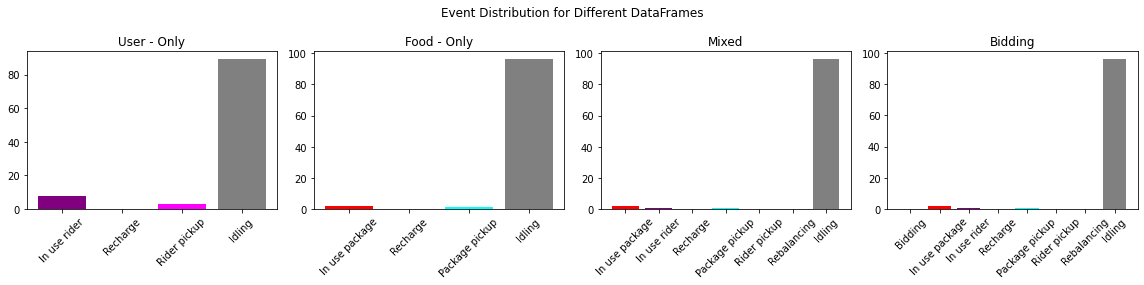

In [59]:

# Create a list of DataFrames
data_frames = [time_u, time_f, time, time_b]
titles = ['User - Only', 'Food - Only', 'Mixed', 'Bidding']

# Define a color map to ensure consistent colors for the same row names
color_map = {
    'Bidding': 'blue',
    'In use package': 'red',
    'In use rider': 'purple',
    'Recharge': 'orange',
    'Package pickup': 'cyan',
    'Rider pickup': 'magenta',
    'Rebalancing': 'brown',
    'Idling': 'gray',
}

# Create subplots for bar charts
fig, axes = plt.subplots(1, 4, figsize=(16, 4), facecolor='white')  # Set facecolor to white


for i, ax in enumerate(axes):
    df = data_frames[i]

    # Filter out rows with Percentage > 0 (optional, to exclude zero percentage values)
    df = df[df['Time Percentage'] > 0]

    # Get unique row names and corresponding colors
    unique_rows = df['New Column Name']
    values = df['Time Percentage']
    colors = [color_map.get(row, 'gray') for row in unique_rows]

    # Create the bar chart with improved settings
    ax.bar(unique_rows, values, color=colors)

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

    # Add a title for each subplot
    ax.set_title(titles[i])

# Add a common title for all subplots
fig.suptitle('Event Distribution for Different DataFrames')



# Display the subplots
plt.tight_layout()
plt.show()


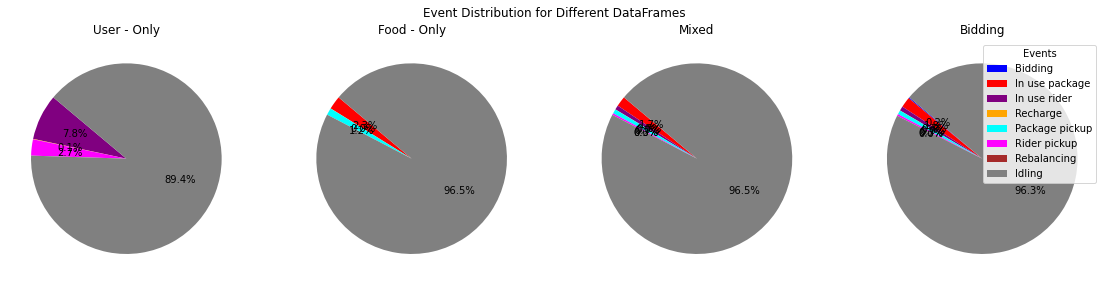

In [44]:

# Create a list of DataFrames
data_frames = [time_u, time_f, time, time_b]
titles = ['User - Only', 'Food - Only', 'Mixed', 'Bidding']

# Define a color map to ensure consistent colors for the same row names
color_map = {
    'Bidding': 'blue',
    'In use package': 'red',
    'In use rider': 'purple',
    'Recharge': 'orange',
    'Package pickup': 'cyan',
    'Rider pickup': 'magenta',
    'Rebalancing': 'brown',
    'Idling': 'gray',
}

# Create subplots for pie charts
fig, axes = plt.subplots(1, 4, figsize=(16, 4), facecolor='white')  # Set facecolor to white

for i, ax in enumerate(axes):
    df = data_frames[i]

    # Filter out rows with Percentage > 0 (optional, to exclude zero percentage values)
    df = df[df['Time Percentage'] > 0]

    # Get unique row names and corresponding colors
    unique_rows = df['New Column Name'].unique()
    colors = [color_map.get(row, 'gray') for row in unique_rows]

    # Create the pie chart with improved settings
    wedges, texts, autotexts = ax.pie(
        df['Time Percentage'],
        labels=None,  # Remove labels from the pie
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,  # Use the assigned colors from the color map
    )

    # Add a title for each subplot
    ax.set_title(titles[i])

# Add a common title for all subplots
fig.suptitle('Event Distribution for Different DataFrames')

# Add a legend to the last subplot
axes[-1].legend(wedges, unique_rows, title="Events")

# Display the subplots
plt.tight_layout()
plt.show()



### Distance

In [66]:
# Create a new DataFrame with the renamed columns
dist = percentage_distance_df.rename(columns={'Event': 'New Column Name'})
dist_u = percentage_distance_df_u.rename(columns={'Event': 'New Column Name'})
dist_f = percentage_distance_df_f.rename(columns={'Event': 'New Column Name'})
dist_b = percentage_distance_df_b.rename(columns={'Event': 'New Column Name'})

# Map the old column names to new column names
dist['New Column Name'] = dist['New Column Name'].map(column_mapping)
dist_u['New Column Name'] = dist_u['New Column Name'].map(column_mapping)
dist_f['New Column Name'] = dist_f['New Column Name'].map(column_mapping)
dist_b['New Column Name'] = dist_b['New Column Name'].map(column_mapping)


In [67]:
# Create a list of DataFrames
data_frames = [dist_u, dist_f, dist, dist_b]
titles = ['User - Only', 'Food - Only', 'Mixed', 'Bidding']

# Concatenate the DataFrames along the rows, using the titles as keys
consolidated_df = pd.concat(data_frames, keys=titles)

# Reset the index for the consolidated DataFrame
consolidated_df.reset_index(level=0, inplace=True)
consolidated_df.rename(columns={'level_0': 'Title', 'New Column Name': 'Event'}, inplace=True)

# Aggregate the duplicate entries by taking the mean (you can also use sum)
pivot_df = consolidated_df.pivot_table(index='Event', columns='Title', values='Distance Percentage', aggfunc='mean')


In [68]:
pivot_df

Title,Bidding,Food - Only,Mixed,User - Only
Event,,,,
Bidding,0.000000,NaN,NaN,NaN
Idling,0.000000,0.000000,0.000000,0.000000
In use package,47.731445,66.010058,46.878901,NaN
In use rider,25.981170,NaN,25.517210,78.881012
Package pickup,18.005063,33.426082,19.700881,NaN
Rebalancing,0.246936,NaN,0.094772,NaN
Recharge,0.514749,0.563860,0.513980,0.501433
Rider pickup,7.520637,NaN,7.294256,20.617555


In [72]:
print('User only dist: ' ,bike_df_u['Distance Traveled'].sum()/1000)
print('Food only dist: ' ,bike_df_f['Distance Traveled'].sum()/1000)
print('Mixed dist: ' ,bike_df['Distance Traveled'].sum()/1000)
print('Bidding dist: ' ,bike_df_b['Distance Traveled'].sum()/1000)


User only dist:  1103041.3412050887
Food only dist:  207718.82055716994
Mixed dist:  293965.5001288135
Bidding dist:  288717.8991371347
